# Try2. Google Colab에서 Streamlit 구현 - localtunnel 활용

In [2]:
# colab에 streamlit 설치
!pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# colab에 localtunnel 설치
# 23.04.09 현재 ERROR 문구 발생. localtunnel 페이지는 생성됨.
!pip install localtunnel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement localtunnel (from versions: none)
ERROR: No matching distribution found for localtunnel


In [ ]:
# StackOverflow 트러블 슈팅 답변 중 하나 => 미해결
# !pip install --upgrade protobuf

!pip install --upgrade protobuf 설치 후 app.py 실행해보았을 때
- Time-out에러 발생

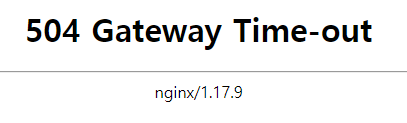

In [4]:
# webrtc 설치
!pip install -U streamlit-webrtc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
# 클라우드 리눅스 커널에 app.py 파일 만들기
# 테스트 app.py 파일 1
# webrtc 구현 코드 => ModuleNotFoundError 발생
%%writefile app.py
from streamlit_webrtc import webrtc_streamer, RTCConfiguration, WebRtcMode, WebRtcStreamerContext

webrtc_ctx = webrtc_streamer(
    key="object-detection",
    mode=WebRtcMode.SENDRECV,
    rtc_configuration={"iceServers": [{"urls": ["stun:stun.l.google.com:19302"]}]},
    media_stream_constraints={"video": True},
    async_processing=True,
)

Overwriting app.py


1번 app.py 실행했을 때
- Streamlit이 실행되고, 웹캠 코드까지 실행됨
- 카메라 사용 허용 => 카메라 장비 설정 => 카메라 실행까지 가능

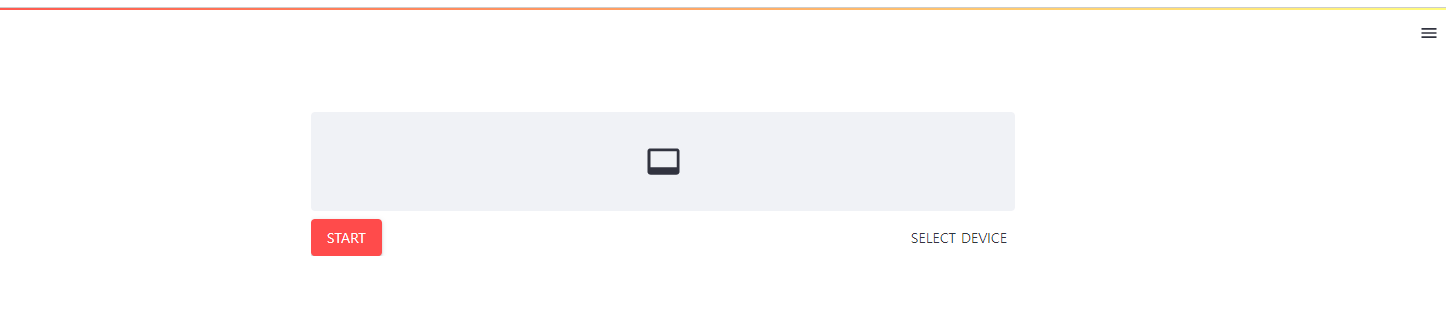

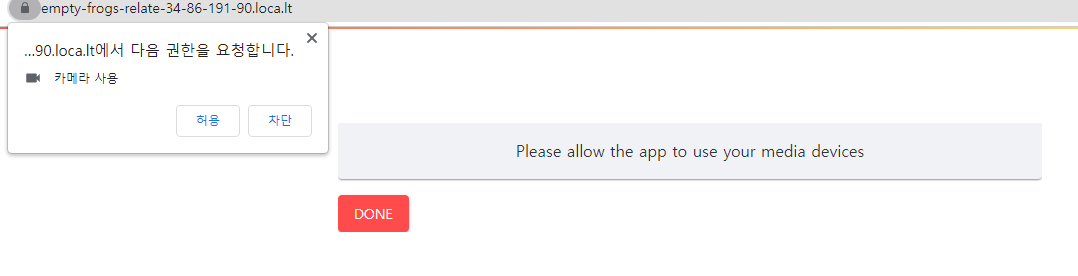

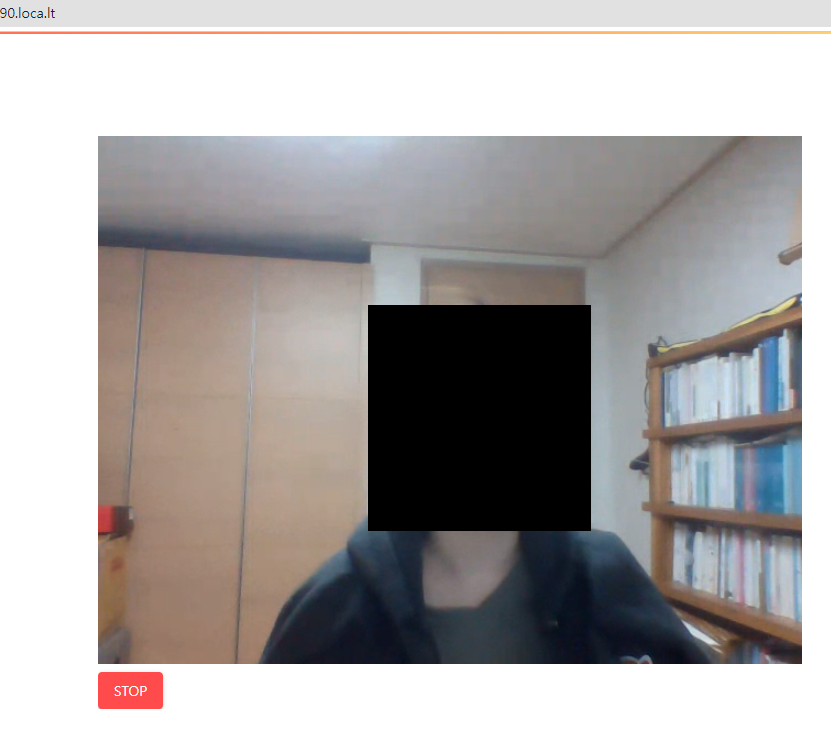

In [ ]:
# 테스트 app.py 파일 2
# 이미지를 업로드 구현 코드 => 정상 동작
%%writefile app.py
import streamlit as st
import pandas as pd

uploaded_file = st.file_uploader(
    label = '원하는 이미지를 업로드 해주세요',
    type=["jpg", 'png'],
    accept_multiple_files=False
)

Overwriting app.py


2번 app.py 실행했을 때
- 이미지 or 동영상 파일을 첨부해 인물 탐지 하는 것을 스트림릿으로 구현하는 용도
  
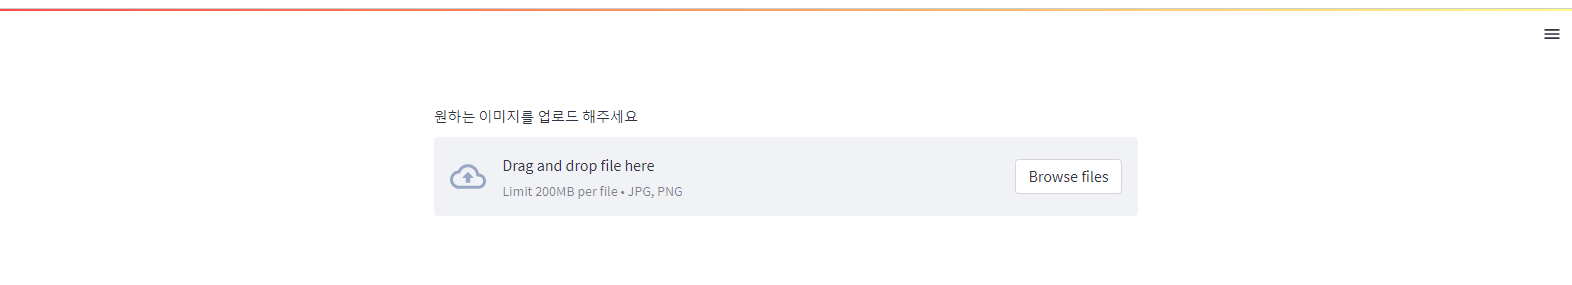

In [8]:
# booting server
!streamlit run /content/app.py &>/content/logs.txt &
!npx localtunnel --port 8501

npx: installed 22 in 2.099s
your url is: https://empty-frogs-relate-34-86-191-90.loca.lt
^C


- 8501 포트가 실행이 안될 때
--port 할 터미널 8501 제외 5000 변경 시 등 작동 안함